# Decision Tree - Regression Task - Company sales data
 
About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

|Feature|Description|
|:----|:-----|
|Sales|Unit sales (in thousands) at each location
|Competitor Price|Price charged by competitor at each location
|Income|Community income level (in thousands of dollars)
|Advertising|Local advertising budget for company at each location (in thousands of dollars)
|Population|Population size in region (in thousands)
|Price|Price company charges for car seats at each site
|Shelf Location at stores|A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site|
|Age|Average age of the local population|
|Education|Education level at each location|
|Urban|A factor with levels No and Yes to indicate whether the store is in an urban or rural location|
|US|A factor with levels No and Yes to indicate whether the store is in the US or not|

The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df['Urban'] = df['Urban'].map({'Yes':1, 'No':0})
df['US'] = df['US'].map({'Yes':1, 'No':0})
df['ShelveLoc'] = df['ShelveLoc'].map({'Bad':0, 'Good':1, 'Medium':2})
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
ShelveLoc,400.0,1.307500,0.833475,0.0,1.00,2.00,2.00,2.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00
Urban,400.0,0.705000,0.456614,0.0,0.00,1.00,1.00,1.00


In [10]:
df.duplicated().sum()

0

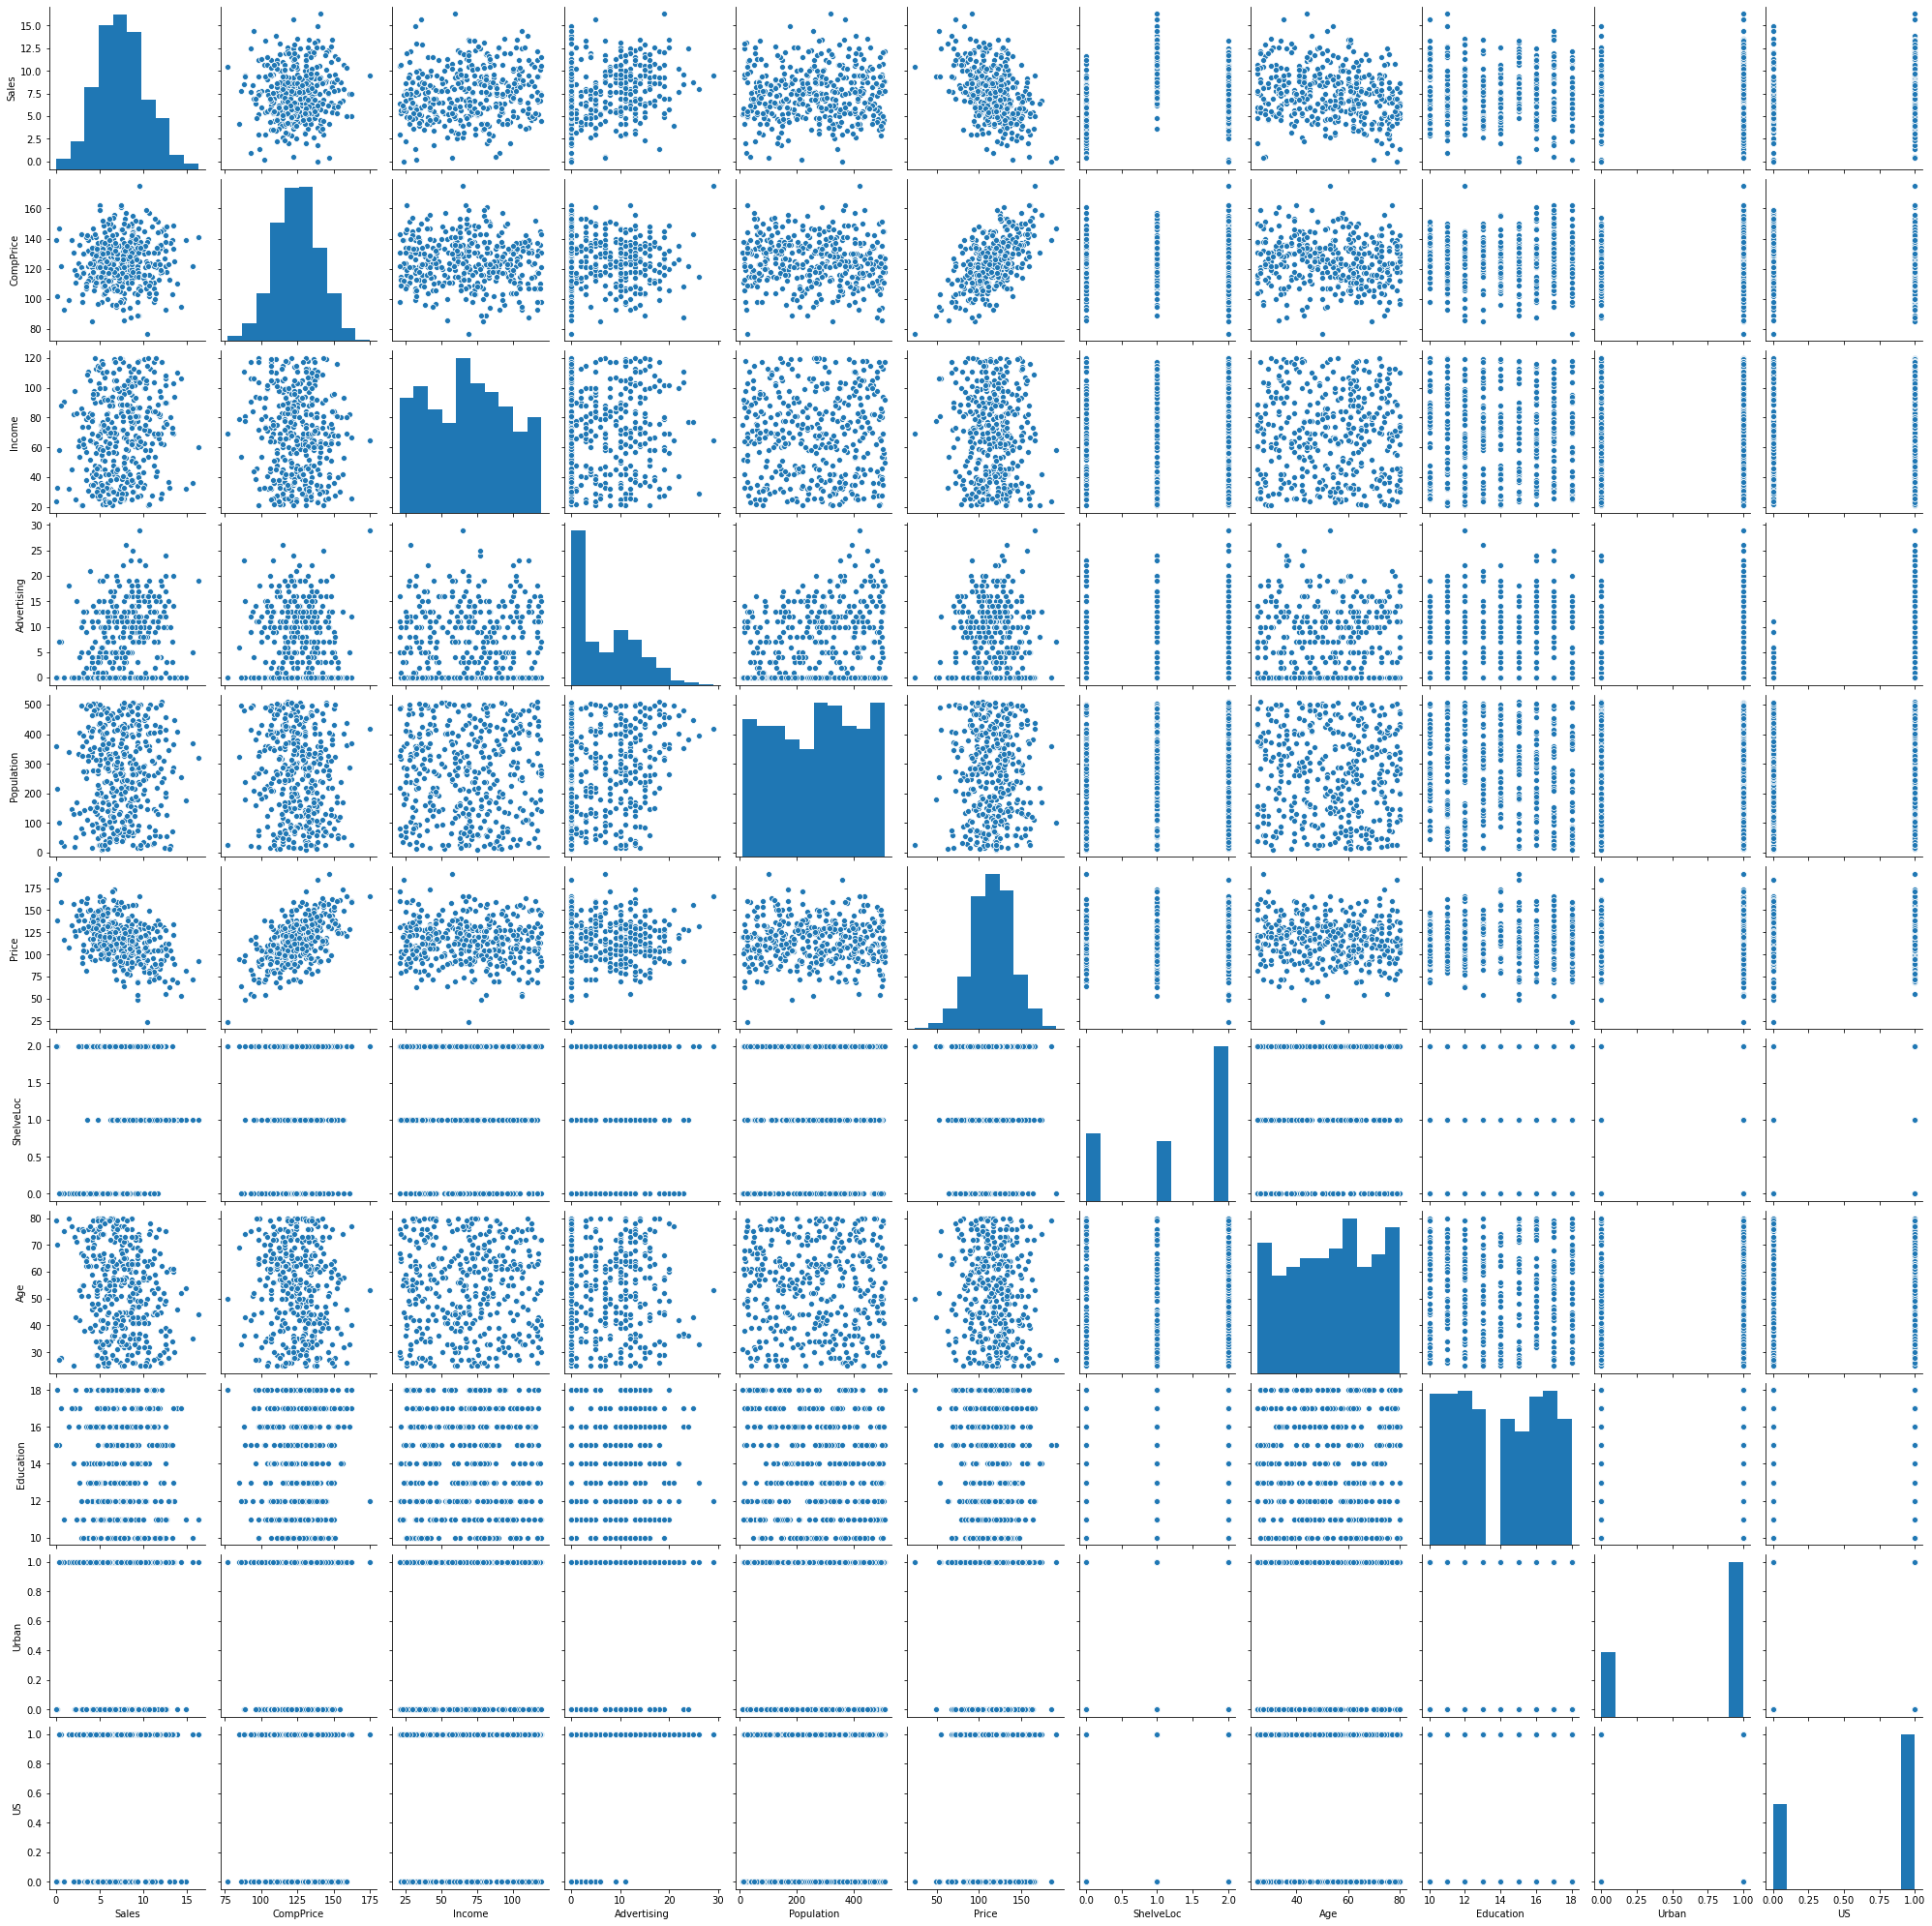

In [11]:
# EDA
sns.pairplot(df)

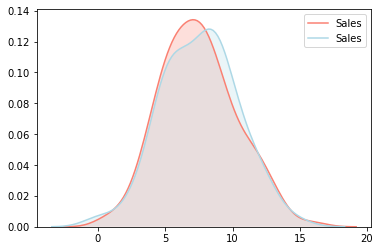

In [22]:
ax = sns.kdeplot(df.loc[df['Urban']==1,'Sales'],color='Salmon',shade=True)
ax = sns.kdeplot(df.loc[df['Urban']==0,'Sales'],color='lightblue',shade=True)

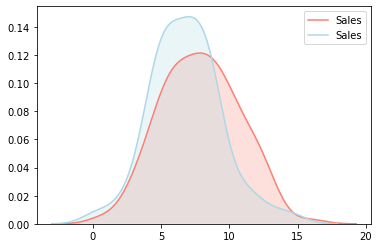

In [23]:
ax = sns.kdeplot(df.loc[df['US']==1,'Sales'],color='Salmon',shade=True)
ax = sns.kdeplot(df.loc[df['US']==0,'Sales'],color='lightblue',shade=True)

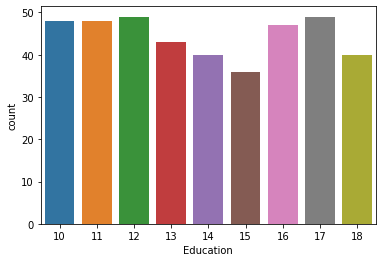

In [25]:
sns.countplot(data=df,x='Education')

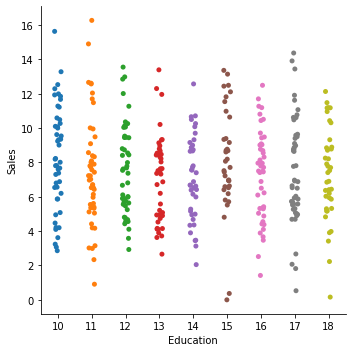

In [32]:
sns.catplot(data=df,x='Education',y='Sales')

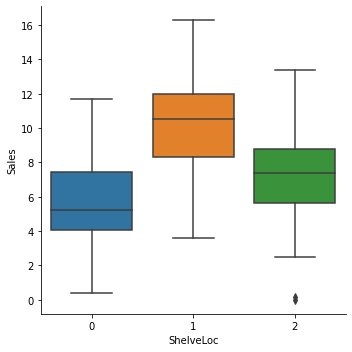

In [36]:
sns.catplot(data= df,x='ShelveLoc',y='Sales', kind = 'box')

In [40]:
# Model development

X = df.drop(columns='Sales')
y = df['Sales']

#scaling not necessary for Decision Tree. So proceed with Train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
#plot_confusion_matrix(model)

RMSE: 2.4821865361007824


In [46]:
y_test.mean()

# Error is quite high, our model needs further improvement

7.824583333333335

In [51]:
model2 = DecisionTreeRegressor(criterion='mae')
model2.fit(X_train,y_train)
y_pred= model2.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')

RMSE: 2.043237015130648


In [64]:
feat = pd.DataFrame(model2.feature_importances_,index=X_train.columns,columns=['Feature importances']).sort_values(by='Feature importances',ascending=False)

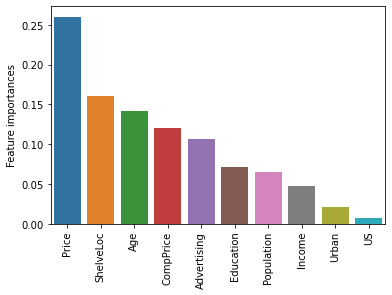

In [69]:
sns.barplot(data=feat,y='Feature importances',x=feat.index)
plt.xticks(rotation=90);

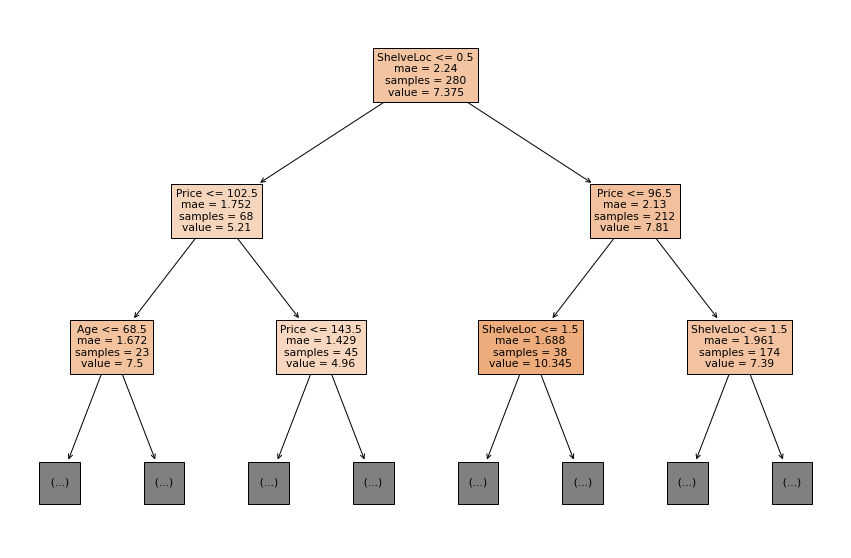

In [63]:
plt.figure(figsize=(15,10))
plot_tree(model2,max_depth=2,filled=True,feature_names=X_train.columns);

# Thank you!

In [70]:
df.to_csv('Company_Data_modified.csv',index=False)